# Perbandingan Algoritma dalam Prediksi Sepak Bola 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Pengambilan Data dari CSV

In [16]:
encoding= {"HOME":0, "AWAY":1, "DRAW":2}
df = pd.read_csv('dataset.csv')
df.head()

,winrate_home,winrate_away,rank_home,rank_away,head_to_head,home_prob,draw_prob,away_prob,game_conclusion
0,-0.689655,-0.769231,0.250,1.375,1.5,0.377894,-0.215346,-0.257585,0
1,0.689655,0.769231,0.875,-0.250,0.0,-1.553156,-1.121395,2.144153,1
2,0.000000,0.000000,-0.750,0.500,0.0,-0.286949,0.283720,0.226528,0
3,-0.103448,1.038462,1.125,0.500,0.0,-0.906443,0.385151,0.978123,2
4,0.655172,1.230769,-0.375,0.875,0.0,-0.362466,0.367991,0.371087,2


In [4]:
def encode(labels): 
    one_hot_label = np.zeros((len(labels),3))
    for i in range(len(labels)):
        one_hot_label[i, labels[i]] = 1
    
    return one_hot_label

In [17]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_train, y_train)
print(model.feature_importances_)

[0.12261094 0.12124695 0.11844362 0.1155382  0.04858192 0.17790215
 0.13764006 0.15803615]


## Fungsi Umum Regresi

In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def smape(A, F):
    summ = 0
    for i in range(len(A)):
        tmp = (abs(A[i])+abs(F[i])) / 2
        if tmp == 0:
            continue
        summ += (abs(F[i]- A[i]) / tmp)
    return (1/len(A)) * summ

def plot_regression(actual, pred30, pred50, pred70, title):
    plt.figure(figsize=(12,6))
    plt.plot(actual[:15])
    plt.plot(pred30[:15][0])
    plt.plot(pred50[:15][0])
    plt.plot(pred70[:15][0])
    plt.legend(['actual', 'prediction test 30%', 'prediction test 50%', 'prediction test 70%'])
    plt.title(title)

In [33]:
import time
from sklearn.metrics import accuracy_score
def regression(model):
    start_time = time.time()
    
    var_model = model
    var_model.fit(x_train, y_train)
    y_pred = var_model.predict(x_test)
    y_pred = [np.argmax(y) for y in y_pred]
    elapsed_time = time.time() - start_time
    print('Algoritma berjalan selama: ',elapsed_time,' detik')
    print('Akurasi algoritma',accuracy_score(y_test,y_pred)*100,"%")

    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    # plot_regression(list(y_test), y_pred)
    return y_pred, y_test

## Penggunaan Test Size 30%

In [53]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

x = df.drop('game_conclusion',1)
y = df['game_conclusion']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = encode(np.array(y_train))

y_pred_30_percen = []

In [54]:
from sklearn.tree import DecisionTreeRegressor
y_pred, y_test = regression(DecisionTreeRegressor())
y_pred_30_percen.append(y_pred)

Algoritma berjalan selama:  0.04538774490356445  detik
Akurasi algoritma 42.14611872146119 %
Root Mean Squared Error: 1.0981512068287138
Mean Absolute Error: 0.7876712328767124


In [55]:
from sklearn.neural_network import MLPClassifier
y_pred = regression(MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 3), random_state=1))
y_pred_30_percen.append(y_pred)

Algoritma berjalan selama:  1.033909559249878  detik
Akurasi algoritma 51.87214611872146 %
Root Mean Squared Error: 1.0457568101313388
Mean Absolute Error: 0.6853881278538813


In [56]:
from sklearn.tree import ExtraTreeClassifier
y_pred, y_test = regression(ExtraTreeClassifier())
y_pred_30_percen.append(y_pred)

Algoritma berjalan selama:  0.023894786834716797  detik
Akurasi algoritma 41.050228310502284 %
Root Mean Squared Error: 1.121601920281839
Mean Absolute Error: 0.8123287671232877


In [57]:
from sklearn.ensemble import RandomForestClassifier
y_pred = regression(RandomForestClassifier())
y_pred_30_percen.append(y_pred)

Algoritma berjalan selama:  0.12807393074035645  detik
Akurasi algoritma 48.49315068493151 %
Root Mean Squared Error: 1.0714220482515058
Mean Absolute Error: 0.726027397260274


In [58]:
from sklearn.linear_model import RidgeClassifierCV
y_pred, y_test = regression(RidgeClassifierCV())
y_pred_30_percen.append(y_pred)

Algoritma berjalan selama:  0.013181209564208984  detik
Akurasi algoritma 46.073059360730596 %
Root Mean Squared Error: 1.1082917045088378
Mean Absolute Error: 0.7689497716894977


## Penggunaan Test Size 50%

In [59]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

x = df.drop('game_conclusion',1)
y = df['game_conclusion']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=42)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = encode(np.array(y_train))

y_pred_50_percen = []

In [60]:
from sklearn.tree import DecisionTreeRegressor
y_pred, y_test = regression(DecisionTreeRegressor())
y_pred_50_percen.append(y_pred)

Algoritma berjalan selama:  0.07683062553405762  detik
Akurasi algoritma 41.61643835616438 %
Root Mean Squared Error: 1.1052799806458264
Mean Absolute Error: 0.7964383561643835


In [61]:
from sklearn.neural_network import MLPClassifier
y_pred = regression(MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 3), random_state=1))
y_pred_50_percen.append(y_pred)

Algoritma berjalan selama:  0.6309182643890381  detik
Akurasi algoritma 50.84931506849315 %
Root Mean Squared Error: 1.061144380968148
Mean Absolute Error: 0.703013698630137


In [62]:
from sklearn.tree import ExtraTreeClassifier
y_pred, y_test = regression(ExtraTreeClassifier())
y_pred_50_percen.append(y_pred)

Algoritma berjalan selama:  0.021511554718017578  detik
Akurasi algoritma 41.205479452054796 %
Root Mean Squared Error: 1.101555562617813
Mean Absolute Error: 0.7964383561643835


In [63]:
from sklearn.ensemble import RandomForestClassifier
y_pred = regression(RandomForestClassifier())
y_pred_50_percen.append(y_pred)

Algoritma berjalan selama:  0.1513664722442627  detik
Akurasi algoritma 48.93150684931507 %
Root Mean Squared Error: 1.0701427378868926
Mean Absolute Error: 0.7221917808219178


In [64]:
from sklearn.linear_model import RidgeClassifierCV
y_pred, y_test = regression(RidgeClassifierCV())
y_pred_50_percen.append(y_pred)

Algoritma berjalan selama:  0.03140687942504883  detik
Akurasi algoritma 45.61643835616439 %
Root Mean Squared Error: 1.1209096110589754
Mean Absolute Error: 0.7813698630136986


## Penggunaan Test Size 70%

In [65]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

x = df.drop('game_conclusion',1)
y = df['game_conclusion']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=42)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = encode(np.array(y_train))

y_pred_70_percen = []

In [66]:
from sklearn.tree import DecisionTreeRegressor
y_pred, y_test = regression(DecisionTreeRegressor())
y_pred_70_percen.append(y_pred)

Algoritma berjalan selama:  0.03633522987365723  detik
Akurasi algoritma 41.178082191780824 %
Root Mean Squared Error: 1.1050320766434607
Mean Absolute Error: 0.7991780821917808


In [67]:
from sklearn.neural_network import MLPClassifier
y_pred = regression(MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 3), random_state=1))
y_pred_70_percen.append(y_pred)

Algoritma berjalan selama:  0.7638185024261475  detik
Akurasi algoritma 50.84931506849315 %
Root Mean Squared Error: 1.061144380968148
Mean Absolute Error: 0.703013698630137


In [68]:
from sklearn.tree import ExtraTreeClassifier
y_pred, y_test = regression(ExtraTreeClassifier())
y_pred_70_percen.append(y_pred)

Algoritma berjalan selama:  0.022480487823486328  detik
Akurasi algoritma 41.342465753424655 %
Root Mean Squared Error: 1.1153966061635188
Mean Absolute Error: 0.8057534246575343


In [69]:
from sklearn.ensemble import RandomForestClassifier
y_pred = regression(RandomForestClassifier())
y_pred_70_percen.append(y_pred)

Algoritma berjalan selama:  0.16042733192443848  detik
Akurasi algoritma 48.87671232876713 %
Root Mean Squared Error: 1.0742311682034393
Mean Absolute Error: 0.7254794520547945


In [70]:
from sklearn.linear_model import RidgeClassifierCV
y_pred, y_test = regression(RidgeClassifierCV())
y_pred_70_percen.append(y_pred)

Algoritma berjalan selama:  0.028957605361938477  detik
Akurasi algoritma 45.61643835616439 %
Root Mean Squared Error: 1.1209096110589754
Mean Absolute Error: 0.7813698630136986


## Visualisasi Graf

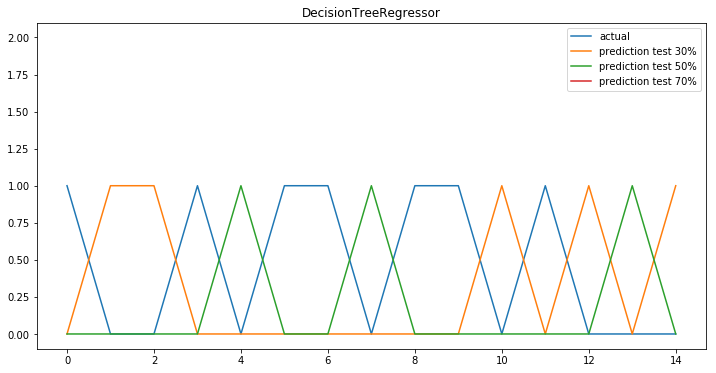

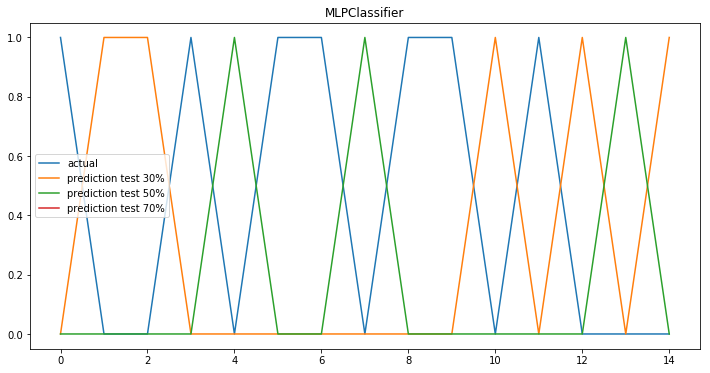

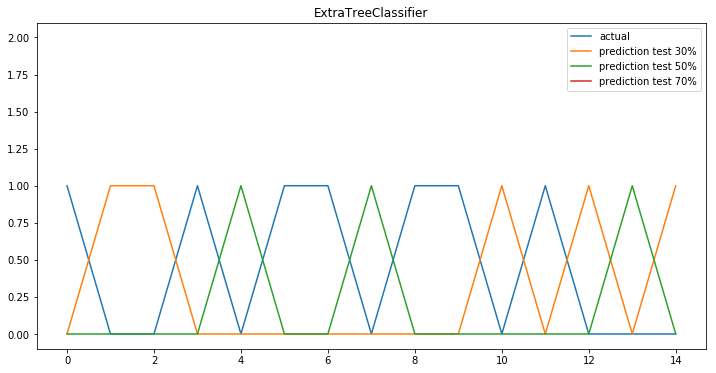

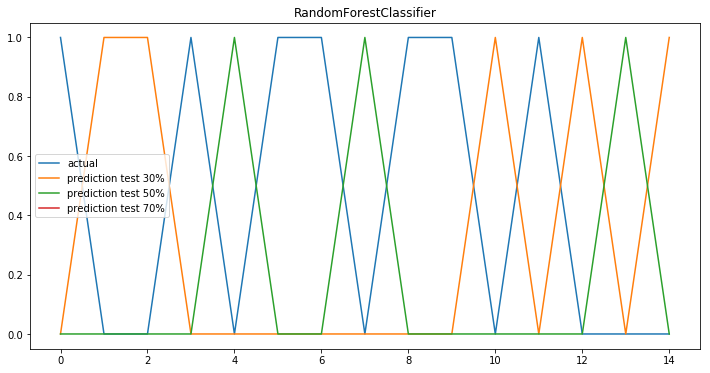

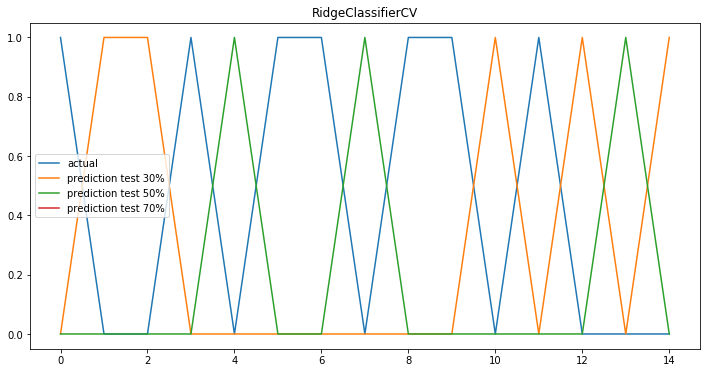

In [111]:
classifier_name = ['DecisionTreeRegressor',
                  'MLPClassifier',
                  'ExtraTreeClassifier',
                  'RandomForestClassifier',
                  'RidgeClassifierCV']
for i in range(5):
    if i == 1 or i == 3:
        plot_regression(
            encode(np.array(y_test)),
            y_pred_30_percen[i][0],
            y_pred_50_percen[i][0],
            y_pred_70_percen[i][0],
            classifier_name[i])
    else:
        plot_regression(
            encode(np.array(y_test)),
            y_pred_30_percen[i],
            y_pred_50_percen[i],
            y_pred_70_percen[i],
            classifier_name[i])